📚 Daftar Peminjaman Lengkap:

    id nama_anggota       judul_buku  tgl_pinjam tgl_kembali
0    1        Rendi   Laskar Pelangi  2025-11-01  2025-11-05
1    2        Rendi     Bumi Manusia  2025-11-02        None
2    3        Sinta  Negeri 5 Menara  2025-11-03  2025-11-07
3    4         Andi    Filosofi Kopi  2025-11-04  2025-11-09
4    5        Rendi   Laskar Pelangi  2025-11-01  2025-11-05
5    6        Rendi     Bumi Manusia  2025-11-02        None
6    7        Sinta  Negeri 5 Menara  2025-11-03  2025-11-07
7    8         Andi    Filosofi Kopi  2025-11-04  2025-11-09
8    9        Rendi   Laskar Pelangi  2025-11-01  2025-11-05
9   10        Rendi     Bumi Manusia  2025-11-02        None
10  11        Sinta  Negeri 5 Menara  2025-11-03  2025-11-07
11  12         Andi    Filosofi Kopi  2025-11-04  2025-11-09
12  13        Rendi   Laskar Pelangi  2025-11-01  2025-11-05
13  14        Rendi     Bumi Manusia  2025-11-02        None
14  15        Sinta  Negeri 5 Menara  2025-11-03  2025-

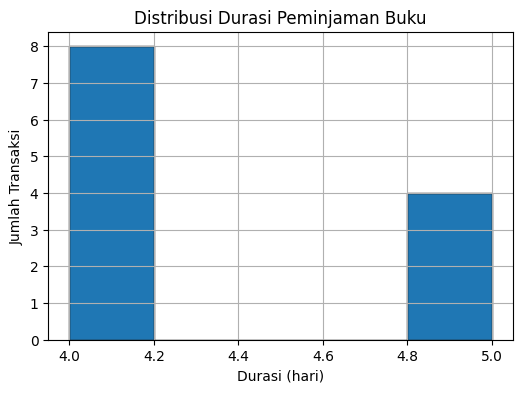

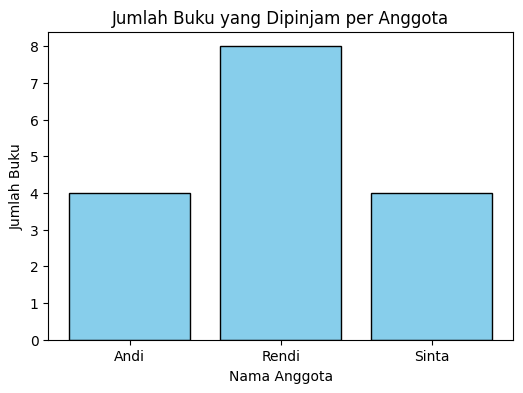

In [4]:
# --- Instalasi dan import library ---
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Membuat koneksi dan database SQLite ---
conn = sqlite3.connect('perpustakaan.db')
cursor = conn.cursor()

# --- 2. Membuat tabel sesuai spesifikasi ---
cursor.execute('''
CREATE TABLE IF NOT EXISTS buku (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    judul TEXT NOT NULL,
    penulis TEXT NOT NULL,
    tahun INTEGER NOT NULL
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS anggota (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nama TEXT NOT NULL,
    email TEXT NOT NULL
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS peminjaman (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    id_anggota INTEGER,
    id_buku INTEGER,
    tgl_pinjam TEXT,
    tgl_kembali TEXT,
    FOREIGN KEY (id_anggota) REFERENCES anggota(id),
    FOREIGN KEY (id_buku) REFERENCES buku(id)
);
''')

conn.commit()

# --- 3. Tambahkan data ke tabel buku dan anggota ---
cursor.executemany('INSERT INTO buku (judul, penulis, tahun) VALUES (?, ?, ?)', [
    ('Laskar Pelangi', 'Andrea Hirata', 2005),
    ('Bumi Manusia', 'Pramoedya Ananta Toer', 1980),
    ('Negeri 5 Menara', 'Ahmad Fuadi', 2009),
    ('Filosofi Kopi', 'Dee Lestari', 2006),
    ('Dilan 1990', 'Pidi Baiq', 2014)
])

cursor.executemany('INSERT INTO anggota (nama, email) VALUES (?, ?)', [
    ('Rendi', 'rendi@example.com'),
    ('Sinta', 'sinta@example.com'),
    ('Andi', 'andi@example.com')
])

conn.commit()

# --- 4. Tambahkan data peminjaman (4 transaksi) ---
cursor.executemany('''
INSERT INTO peminjaman (id_anggota, id_buku, tgl_pinjam, tgl_kembali)
VALUES (?, ?, ?, ?)
''', [
    (1, 1, '2025-11-01', '2025-11-05'),
    (1, 2, '2025-11-02', None),   # Belum dikembalikan
    (2, 3, '2025-11-03', '2025-11-07'),
    (3, 4, '2025-11-04', '2025-11-09')
])

conn.commit()

# --- 5a. Tampilkan daftar peminjaman lengkap (JOIN) ---
query_join = '''
SELECT p.id, a.nama AS nama_anggota, b.judul AS judul_buku,
       p.tgl_pinjam, p.tgl_kembali
FROM peminjaman p
JOIN anggota a ON p.id_anggota = a.id
JOIN buku b ON p.id_buku = b.id
ORDER BY p.id;
'''
df_join = pd.read_sql_query(query_join, conn)
print("📚 Daftar Peminjaman Lengkap:\n")
print(df_join)

# --- 5b. Hitung total buku yang dipinjam per anggota ---
query_group = '''
SELECT a.nama AS nama_anggota, COUNT(p.id) AS total_pinjaman
FROM peminjaman p
JOIN anggota a ON p.id_anggota = a.id
GROUP BY a.nama;
'''
df_group = pd.read_sql_query(query_group, conn)
print("\n📊 Jumlah Total Buku yang Dipinjam per Anggota:\n")
print(df_group)

# --- 2a. Buat DataFrame dari hasil query (pakai hasil JOIN) ---
df = df_join.copy()

# --- 2b. Hitung durasi peminjaman (dalam hari) ---
df['tgl_pinjam'] = pd.to_datetime(df['tgl_pinjam'])
df['tgl_kembali'] = pd.to_datetime(df['tgl_kembali'])
df['durasi_hari'] = (df['tgl_kembali'] - df['tgl_pinjam']).dt.days
print("\n📅 Data dengan Durasi Peminjaman:\n")
print(df)

# --- 2c. Visualisasi sederhana ---

# Histogram durasi peminjaman
plt.figure(figsize=(6,4))
df['durasi_hari'].dropna().hist(bins=5, edgecolor='black')
plt.title('Distribusi Durasi Peminjaman Buku')
plt.xlabel('Durasi (hari)')
plt.ylabel('Jumlah Transaksi')
plt.show()

# Diagram batang jumlah buku per anggota
plt.figure(figsize=(6,4))
plt.bar(df_group['nama_anggota'], df_group['total_pinjaman'], color='skyblue', edgecolor='black')
plt.title('Jumlah Buku yang Dipinjam per Anggota')
plt.xlabel('Nama Anggota')
plt.ylabel('Jumlah Buku')
plt.show()